In [1]:
import os
from ms2query.utils import load_pickled_file
from matplotlib import pyplot as plt

path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(os.path.dirname(path_root), "data/gnps_24_11_2021/positive_mode/")


c:\users\jonge094\anaconda3\envs\ms2query\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
training_scores, training_labels, validation_scores, validation_labels = load_pickled_file(os.path.join(path_data, "ms2query_library_files/training_data.pickle"))

### Check if the tanimoto score distribution is relatively equal

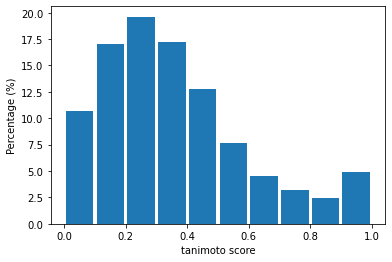

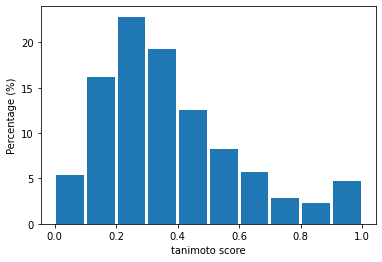

In [3]:
weight_to_convert_to_percentage = 100/len(training_labels)
weights = [weight_to_convert_to_percentage] * len(training_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(training_labels, weights = weights, rwidth = 0.9)
plt.show()

weight_to_convert_to_percentage = 100/len(validation_labels)
weights = [weight_to_convert_to_percentage] * len(validation_labels)
plt.xlabel("tanimoto score")
plt.ylabel("Percentage (%)")
plt.hist(validation_labels, weights = weights, rwidth = 0.9)
plt.show()

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train rf using optimised parameters from below
num_est = 250
rf = RandomForestRegressor(n_estimators = num_est, random_state = 42, max_depth = 5)
rf.fit(training_scores, training_labels)

# predict on train
rf_train_predictions = rf.predict(training_scores)
mse_train_rf = mean_squared_error(training_labels, rf_train_predictions)
print('Training MSE', mse_train_rf)

# predict on test
rf_predictions = rf.predict(validation_scores)
mse_rf = mean_squared_error(validation_labels, rf_predictions)
print('Validation MSE', mse_rf)

# get feature importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(training_scores.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

C:\Users\jonge094\AppData\Local\Temp/ipykernel_1716/2016352250.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(training_scores, training_labels)


Training MSE 0.02843581342148282
Validation MSE 0.02717854535169647
Variable: chemical_neighbourhood_score Importance: 0.51
Variable: mass_similarity      Importance: 0.2
Variable: parent_mass*0.001    Importance: 0.15
Variable: s2v_score            Importance: 0.11
Variable: ms2ds_score          Importance: 0.01
Variable: nr_of_spectra_with_same_inchikey14*0.01 Importance: 0.01
Variable: average_tanimoto_score_for_chemical_neighbourhood_score Importance: 0.01
Variable: average_ms2ds_score_for_inchikey14 Importance: 0.0
Variable: nr_of_spectra_for_chemical_neighbourhood_score*0.01 Importance: 0.0


[None, None, None, None, None, None, None, None, None]

In [6]:
import pickle
pickle.dump(rf, open(os.path.join(path_data, "ms2query_library_files/ms2query_random_forest_model.pickle"), "wb"))